# Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

## Importing the dataset

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [57]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
X = dataset.iloc[:, :-1].values #year experiance
y = dataset.iloc[:, -1].values #salary

In [23]:
print('Y:', y)

Y: [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [114]:
y.size

30

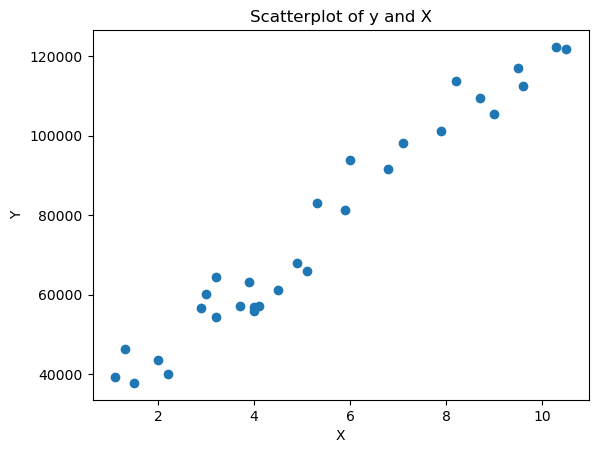

In [26]:
  plt.scatter(X, y)
  plt.title('Scatterplot of y and X')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

## Splitting the dataset into the Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 5)

In [22]:
# train_test_split sklearn parameters: test_size. train_size, stratify, shuffle, random_state
# random_state is the object that controls randomization during splitting. It can be either an int or an instance of RandomState. 
#The default value is None.


## Simple Linear Regression model with OLS

In [94]:
reg = sm.OLS(y_train, X_train).fit()
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              513.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                    3.85e-14
Time:                        16:56:44   Log-Likelihood:                         -196.32
No. Observations:                  18   AIC:                                      394.6
Df Residuals:                      17   BIC:                                      395.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Simple Linear Regression model with sklearn LinearRegression

In [96]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [100]:
r_squared = regressor.score(X_train,y_train)
print(r_squared) # 0 - 1 A good model should have value closer to 1

0.9287195540701644


In [60]:
regressor.intercept_

26932.75353546081

In [61]:
regressor.coef_

array([9274.86875874])

## Predicting the Test set results

In [52]:
y_pred = regressor.predict(X_test)
y_pred

array([ 64032.22857042, 124318.87550222, 102986.67735712, 110406.57236411,
        81654.47921202,  63104.74169454,  40845.05667357,  64959.71544629,
       115044.00674348,  92784.32172251, 122463.90175047,  37135.10917007])

In [110]:
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
print("Mean Square Error:")
print(MSE)
RMSE = math.sqrt(MSE)
print("\nRoot Mean Square Error:")
print(RMSE)

Mean Square Error:
27075024.74991289

Root Mean Square Error:
5203.366674559164


## Visualising the Training set results

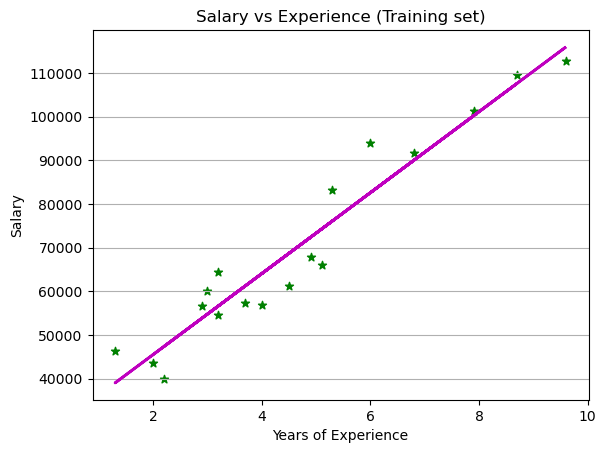

In [91]:
plt.scatter(X_train, y_train, marker = '*', color = 'g')
plt.plot(X_train, regressor.predict(X_train), color = 'm', linewidth = '2')
#plt.grid()
plt.grid(axis = 'y')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

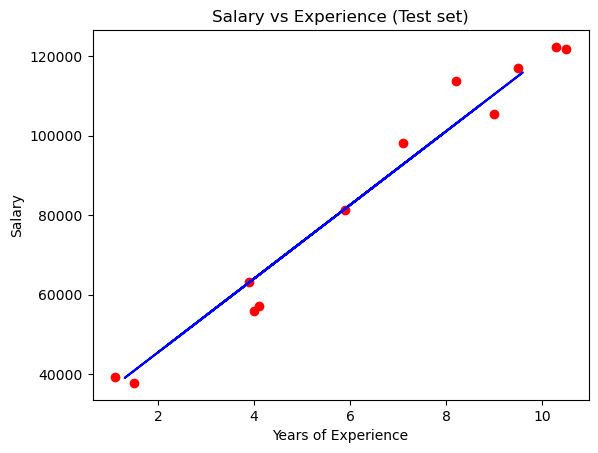

In [56]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [62]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [63]:
mean_absolute_error(y_test,y_pred)

3952.247735948131

In [64]:
mean_absolute_percentage_error(y_test,y_pred)

0.05529166730768478

In [65]:
mean_squared_error(y_test,y_pred)

27075024.74991289

In [67]:
residuals = y_test-y_pred
residuals

array([-8238.22857042, -2446.87550222, 10825.32264288, -4824.57236411,
        -291.47921202,   113.25830546, -3114.05667357, -7878.71544629,
        1924.99325652,  5488.67827749,   -72.90175047,  2207.89082993])